<a href="https://www.kaggle.com/code/akshathkumarch/credit-card-fraud-detection?scriptVersionId=184555397" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


**Importing Libraries**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Data Acquisition**

In [3]:
data = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
data.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
x, y = (data.Class.value_counts())
print(f"Number of Normal Cases:{x}\nNumber of Fraudulent Cases:{y}")

Number of Normal Cases:284315
Number of Fraudulent Cases:284315


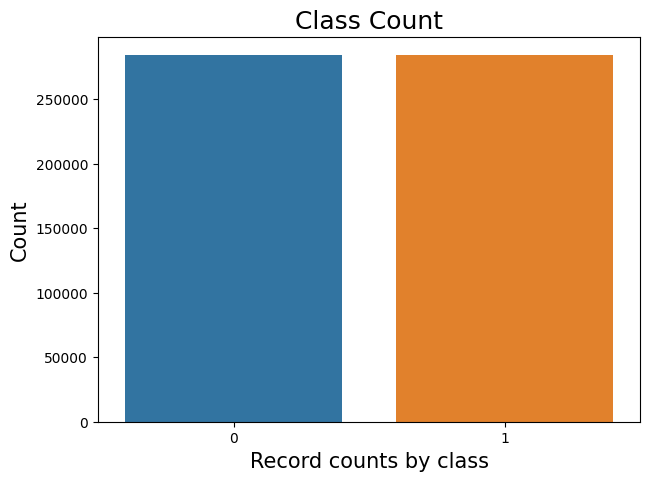

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='Class', data=data)
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

**Obseravation**

The dataset is not biased as bot the number of fraudulent and non-fraudulent cases are equal. So we can go on without making any changes to the dataset.

In [8]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [9]:
data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no Nan values in the Dataset

Some functions

In [10]:
def Standard_Scalar(x):
    x = x.apply(lambda y: (y-y.mean())/y.var())
    return x

def accuracy_fn(pred, true):
    return np.sum(pred == true)/len(pred)

def precision(pred, true):
    return np.sum((pred==1) & (pred==true))/np.sum(pred==1) if np.sum(pred==1)!=0 else 0

def recall(pred, true):
    x = np.sum((pred==1) & (pred==true)) + np.sum((pred==0) & (pred!=true))
    return np.sum((pred==1) & (pred==true))/(x) if x!=0 else 0

def f1Score(pred, true):
    pred = np.array(pred, dtype=np.int64)
    true = np.array(true, dtype=np.int64)
    prec = precision(pred, true)
    rec = recall(pred, true)
    return (2*prec*rec)/(prec + rec) if prec+rec!=0 else 0

In [11]:
X = data.iloc[:,1:-1]
Y = data.Class

In [12]:
X_adjusted = Standard_Scalar(X)
X_adjusted.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05
mean,-1.599449e-18,2.879008e-17,-4.078595e-17,1.247570e-16,1.199587e-17,9.196832e-18,4.398485e-17,-2.519132e-17,3.758705e-17,-3.678733e-17,...,-3.598760e-17,-2.459153e-17,-5.348158e-18,4.648399e-18,-2.439160e-17,-2.149260e-17,8.597039e-18,-2.239229e-17,1.299552e-17,-5.829443e-20
std,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,...,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,9.999991e-01,1.445161e-04
min,-3.495577e+00,-4.996648e+01,-3.183755e+00,-4.951214e+00,-9.952768e+00,-2.111107e+01,-4.351832e+00,-1.075632e+01,-3.751912e+00,-3.163270e+00,...,-7.814770e+01,-1.938249e+01,-7.734785e+00,-3.029540e+01,-4.067961e+00,-1.361261e+01,-8.226955e+00,-1.049861e+01,-3.903517e+01,-2.504507e-04
25%,-5.652849e-01,-4.866768e-01,-6.492976e-01,-6.560191e-01,-2.934950e-01,-4.458704e-01,-2.835324e-01,-1.922569e-01,-5.687436e-01,-5.900998e-01,...,-3.502393e-01,-1.664405e-01,-4.904883e-01,-2.376285e-01,-6.515790e-01,-5.541475e-01,-6.318937e-01,-3.049602e-01,-2.318779e-01,-1.250393e-04
50%,-9.363829e-02,-1.358937e-01,3.528573e-04,-7.376139e-02,8.108774e-02,7.871744e-02,2.333655e-01,-1.145240e-01,9.252631e-02,2.626140e-01,...,-1.233774e-01,-3.743058e-02,-2.732876e-02,-5.968892e-02,1.590120e-02,-8.193147e-03,-1.189206e-02,-1.729108e-01,-1.392971e-02,-2.466013e-07
75%,8.326567e-01,3.435546e-01,6.285369e-01,7.070034e-01,4.397360e-01,4.977872e-01,5.259539e-01,4.729897e-02,5.592611e-01,5.924592e-01,...,2.482160e-01,1.479784e-01,4.638809e-01,1.557151e-01,7.007361e-01,5.500138e-01,6.728867e-01,3.340224e-01,4.095896e-01,1.251919e-04
max,2.229042e+00,4.361858e+00,1.412581e+01,3.201530e+00,4.271682e+01,2.616836e+01,2.178727e+02,5.958030e+00,2.027003e+01,3.172265e+01,...,2.987276e+01,8.087066e+00,1.263249e+01,3.170757e+01,1.296562e+01,1.462148e+01,5.623276e+00,1.132309e+02,7.725580e+01,2.505765e-04


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_adjusted, Y, test_size=0.4, random_state=42)
X_train = np.hstack((np.ones((int(X_train.shape[0]),1)), X_train))
X_test = np.hstack((np.ones((int(X_test.shape[0]),1)), X_test))

Epoch:10|Accuracy:0.9432905990421422|F1-score:0.9406899680581697
Epoch:20|Accuracy:0.9534290018699916|F1-score:0.9531895838059351
Epoch:30|Accuracy:0.9578313959282252|F1-score:0.9577083057747989
Epoch:40|Accuracy:0.9585963924989301|F1-score:0.9585261303581915
Epoch:50|Accuracy:0.9591767347249822|F1-score:0.9590827100360171
Epoch:60|Accuracy:0.9592939755787302|F1-score:0.9592126826001915
Epoch:70|Accuracy:0.9563541611710017|F1-score:0.9549316150589118
Epoch:80|Accuracy:0.9610731055343545|F1-score:0.9614351546688116
Epoch:90|Accuracy:0.9603755224545545|F1-score:0.9603163187727678
Epoch:100|Accuracy:0.96264706399592|F1-score:0.9625746656564411
Accuracy:0.9610203471501679|F1-score:0.9613078353160922


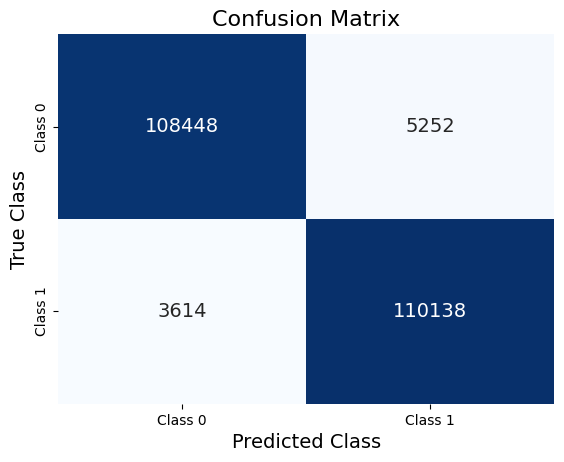

In [14]:
params = np.random.rand((X_test.shape[1]))
def sigmoid(x):
    return 1/(1+np.exp(-np.clip(x, -500, 500)))
def GD(param, pred, true, lr, x):
    param = param - lr*np.matmul(x.T, (pred.squeeze() - true))
    return param


epochs = 100
for i in range(epochs):
    pred = np.round(sigmoid(np.matmul(X_train, params)))
    acc = accuracy_fn(y_train, pred)
    f1_Score = f1Score(y_train, pred)
    if (i+1)% 10 == 0:
        print(f"Epoch:{i+1}|Accuracy:{acc}|F1-score:{f1_Score}")
    params = GD(params, pred, y_train, 0.01, X_train)

test_preds = np.round(sigmoid(np.matmul(X_test, params)))
acc = accuracy_fn(y_test, test_preds)
f1_Score = f1Score(y_test, test_preds)
print(f"Accuracy:{acc}|F1-score:{f1_Score}")
cm = confusion_matrix(y_test, test_preds)

import seaborn as sns
labels=['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()